In [5]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn

In [6]:
# gpu 할당
if torch.cuda.is_available(): DEVICE = 'cuda' 
else: DEVICE = 'cpu'
BATCH_SIZE = 32
EPOCHS = 30
print('torch version : {}'.format(torch.__version__))
print('torch gpu available : {}'.format(DEVICE))
print('Batch_size : {}'.format(BATCH_SIZE))
print('Epochs : {}'.format(EPOCHS))

torch version : 1.7.1+cu110
torch gpu available : cuda
Batch_size : 32
Epochs : 30


In [12]:
# CIFAR10 dataset load
train_datasets = datasets.CIFAR10(root='./Data/CIFAR_10/',train = True, download=True, transform = transforms.ToTensor())
test_datasets = datasets.CIFAR10(root='./Data/CIFAR_10/',train = False, download=True, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_datasets, batch_size= BATCH_SIZE,shuffle = True)
test_loader = torch.utils.data.DataLoader(test_datasets, batch_size= BATCH_SIZE,shuffle = False)

Files already downloaded and verified
Files already downloaded and verified


In [14]:
# check dataset
for image, label in train_loader:
    print('image 크기 : ',image.size())
    print('label 크기 : ',label.size())
    break

image 크기 :  torch.Size([32, 3, 32, 32])
label 크기 :  torch.Size([32])


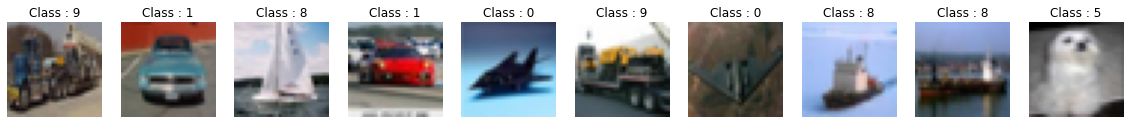

In [17]:
# double check dataset
import matplotlib.pyplot as plt
import numpy as np
pltsize = 2
plt.figure(figsize=(10*pltsize,pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(np.transpose(image[i],(1,2,0)))
    plt.title('Class : ' + str(label[i].item()))

In [21]:
import torchvision.models as models
import torch.nn as nn
model = models.resnet101(pretrained=False)

# model.fc.in_features 는 resnet의 fc layer에 연결되는 노드 수에 접근한다.
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs,10)
model = model.cuda()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

In [31]:
def train(model,x,optimizer,log_interval):
    model.train()
    
    for idx,(image,label) in enumerate(x):
        image = image.to(DEVICE)
        label = label.to(DEVICE)

        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output,label)
        loss.backward()
        optimizer.step()

        if idx % log_interval == 0:
            print("Train Epoch : {} [ {} / {} ]".format(Epoch,idx * len(image), len(train_loader.dataset)),end = '\t')
            print("Train Loss  : {:.6f}".format(loss.item()))

In [32]:
def test(model,x):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)

            output = model(image)
            test_loss += criterion(output,label)
            prediction = output.max(1,keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
        
        test_loss /= len(test_loader.dataset)
        test_accuracy = 100. * correct / len(test_loader.dataset)

        return test_loss, test_accuracy


In [34]:
for Epoch in range(1,EPOCHS+1):
    train(model,train_loader,optimizer,200)
    test_loss, test_accuracy = test(model, test_loader)
    print('[Epoch : {}]] : Test Loss : {}\tTest Accuracy : {}'.format(Epoch,test_loss,test_accuracy))

Train Epoch : 1 [ 0 / 50000 ]	Train Loss  : 1.965546
Train Epoch : 1 [ 6400 / 50000 ]	Train Loss  : 2.115554
Train Epoch : 1 [ 12800 / 50000 ]	Train Loss  : 1.421021
Train Epoch : 1 [ 19200 / 50000 ]	Train Loss  : 1.417743
Train Epoch : 1 [ 25600 / 50000 ]	Train Loss  : 1.707637
Train Epoch : 1 [ 32000 / 50000 ]	Train Loss  : 1.516259
Train Epoch : 1 [ 38400 / 50000 ]	Train Loss  : 2.215621
Train Epoch : 1 [ 44800 / 50000 ]	Train Loss  : 1.719427
[Epoch : 1]] : Test Loss : 0.0561382919549942	Test Accuracy : 36.97
Train Epoch : 2 [ 0 / 50000 ]	Train Loss  : 1.867681
Train Epoch : 2 [ 6400 / 50000 ]	Train Loss  : 1.888152
Train Epoch : 2 [ 12800 / 50000 ]	Train Loss  : 1.423285
Train Epoch : 2 [ 19200 / 50000 ]	Train Loss  : 1.660604
Train Epoch : 2 [ 25600 / 50000 ]	Train Loss  : 1.626267
Train Epoch : 2 [ 32000 / 50000 ]	Train Loss  : 1.476713
Train Epoch : 2 [ 38400 / 50000 ]	Train Loss  : 1.821464
Train Epoch : 2 [ 44800 / 50000 ]	Train Loss  : 1.508378
[Epoch : 2]] : Test Loss : 0.1